In [297]:
import matplotlib.pyplot as plt
import numpy as np

def term_structure(t):
    T_max= t[-1]
    # Define a term structure function that could depend on t
    # Simple sinusoidal term structure for demonstration
    return 100 + 20 * np.cos(2*T_max * np.pi * t /T_max) + np.exp(0.5*t)


def sigma_instantanous(t, T, a= 0.9, b = 0.6, c= 0.1):
    return a / (T - t + b) + c

# Returns the volatility structure from t+tau(?)
def sigma_brs (t, tau, T, a,b,c):
    upper = (a**2/(T - tau + b) - 2*a*c*np.log(T - tau + b) + c**2*tau) 
    lower = (a**2/(T - t + b) - 2*a*c*np.log(T - t + b) + c**2*t) 
    var = (upper-lower)/(tau-t)
    return(np.sqrt(var))

def sigma_factor1(t, tau ,T, a, b):
    upper = (a**2/(T - tau + b))
    lower = (a**2/(T - t + b))
    var = (upper-lower)/(tau-t)
    return(np.sqrt(var))

def sigma_factor2(t, tau,T, a, b,c):
    upper = (- 2*a*c*np.log(T - tau + b))
    lower = (- 2*a*c*np.log(T - t + b))
    var = (upper-lower)/(tau-t)
    return(np.sqrt(var))


def sigma_factor3(t, tau,T,c):
    upper = (c**2*tau)
    lower = (c**2*t)
    var = (upper-lower)/(tau-t)
    return(np.sqrt(var))

### Plot instantaneous volatility at t and tau
Note that instantanous volatility at tau is the integral over the instantanous curve from T to tau.

0.07618969036499237

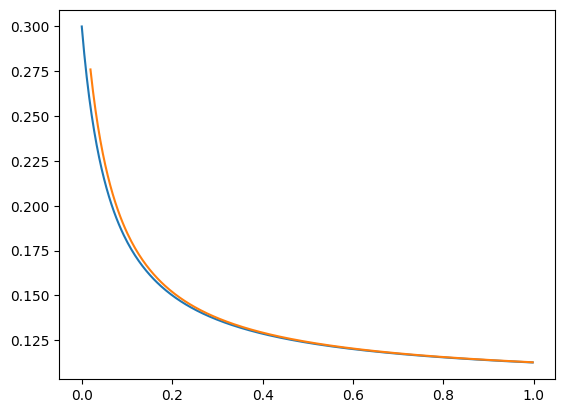

In [298]:
t = 0
T = 1 
tau =1/52
dt = 1/365
#n_steps = int(T / dt)

b = 2/3/10
a = 0.2*b
c = 0.1

times_tau = np.arange(tau, T, dt) 
times_t = np.arange(t, T, dt) 
vol_tau = sigma_brs(t, tau, times_tau, a,b,c)
vol_inst = sigma_instantanous(t, times_t, a, b, c)


plt.plot(times_t, vol_inst)
plt.plot(times_tau, vol_tau)

# Integral of variance instantanous equal to vol_tau.
np.sqrt(sum(vol_inst[0:7]**2)/7)
vol_tau[0]**2 # vol = 0.2760, var = 0.07618969

### Test consistency between total volatility and factors

In [299]:

t = 0
T = 1 
tau =1/12

a= 0.9
b = 0.6
c= 0.1
    
vol = sigma_brs(t, tau, T, a,b,c)

print("volatility:"+ str(vol))
print("Variance:"+ str(vol**2))

f1 = sigma_factor1(t, tau, T, a,b)
f2 = sigma_factor2(t, tau, T, a,b,c)
f3 = sigma_factor3(t, tau, T, c)

print("SumVariance:"+ str((f1**2+f2**2+f3**2)))

volatility:0.6777365035803672
Variance:0.4593267682853411
SumVariance:0.45932676828534064


## Simulation

### One factor

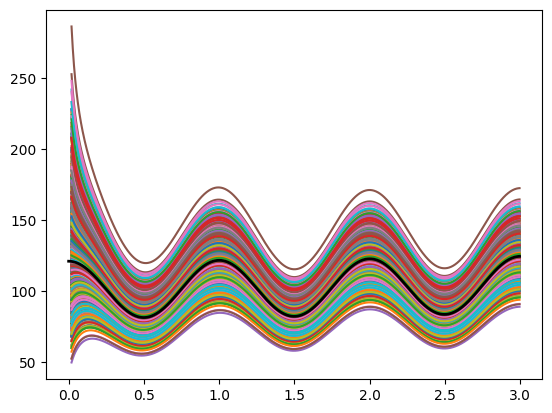

In [300]:
# Parameters 

n_sims = 1000  # Number of paths to simulate
T = 3  # Total time in years
dt = 1/365  # Daily time step
#n_steps = int(T / dt)
tau = 7/365


b = 2/3/10
a = 0.2*b
c = 0.1

times = np.arange(0, T, dt)   # Time steps
times_tau = np.arange(tau, T, dt) 

# Generate independent random samples
w = np.random.randn(n_sims, 1)

term_structure_initial = term_structure(times)
term_structure_tau = term_structure(times_tau)

#sigma = 0.3
vol_tau = sigma_brs(t, tau, times_tau, a,b,c)

z = np.exp(vol_tau * w - 0.5 * vol_tau**2*tau) 

sim_curves = z *  term_structure_tau

# Plot each row as a separate line
for i, row in enumerate(sim_curves):
    plt.plot(times_tau,row, label=f'Row {i+1}')
    
plt.plot(times,term_structure_initial, color='black', lw=2, label='Term Structure')
#plt.plot(times,sigma_brs(t, t+dt, taus, a,b,c), color='black', lw=2, label='Term Structure')



## Check simulation consistency

0.13848495294356286

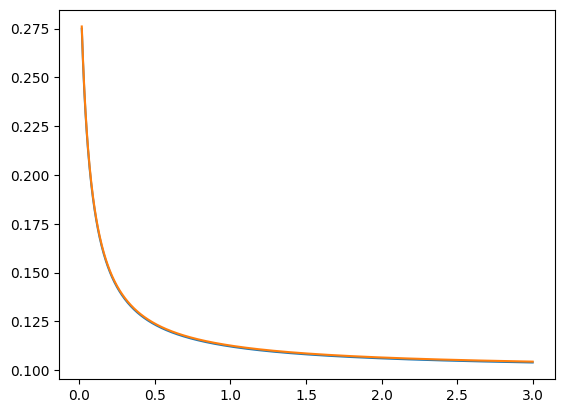

In [301]:
returns = np.log(z)
std_return = np.std(returns, axis = 0) 

plt.plot(times_tau, std_return)
plt.plot(times_tau, vol_tau)
np.sqrt(tau)